In [2]:
import torch
from torch import nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
text = ['hey how are you','good i am fine','have a nice day']

# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

In [4]:
char2int

{'h': 0,
 'r': 1,
 'v': 2,
 ' ': 3,
 'm': 4,
 'd': 5,
 'o': 6,
 'g': 7,
 'e': 8,
 'u': 9,
 'n': 10,
 'c': 11,
 'a': 12,
 'i': 13,
 'f': 14,
 'y': 15,
 'w': 16}

In [5]:
# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))

# Padding

# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '

In [6]:
text

['hey how are you', 'good i am fine ', 'have a nice day']

In [7]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
  input_seq.append(text[i][:-1])
    
    # Remove first character for target sequence
  target_seq.append(text[i][1:])
  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))


Input Sequence: hey how are yo
Target Sequence: ey how are you
Input Sequence: good i am fine
Target Sequence: ood i am fine 
Input Sequence: have a nice da
Target Sequence: ave a nice day


In [8]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

In [9]:
input_seq

[[0, 8, 15, 3, 0, 6, 16, 3, 12, 1, 8, 3, 15, 6],
 [7, 6, 6, 5, 3, 13, 3, 12, 4, 3, 14, 13, 10, 8],
 [0, 12, 2, 8, 3, 12, 3, 10, 13, 11, 8, 3, 5, 12]]

In [10]:
target_seq

[[8, 15, 3, 0, 6, 16, 3, 12, 1, 8, 3, 15, 6, 9],
 [6, 6, 5, 3, 13, 3, 12, 4, 3, 14, 13, 10, 8, 3],
 [12, 2, 8, 3, 12, 3, 10, 13, 11, 8, 3, 5, 12, 15]]

In [11]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [12]:
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)
input_seq

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.

In [11]:
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

In [12]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [13]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        return out, hidden
    
    #def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        #hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        #return hidden

In [14]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 100
lr=0.01

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [15]:
model

Model(
  (rnn): RNN(17, 12, batch_first=True)
  (fc): Linear(in_features=12, out_features=17, bias=True)
)

In [16]:
# Training Run
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    input_seq.to(device)
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100............. Loss: 2.4067
Epoch: 20/100............. Loss: 2.2129
Epoch: 30/100............. Loss: 1.9114
Epoch: 40/100............. Loss: 1.5551
Epoch: 50/100............. Loss: 1.1791
Epoch: 60/100............. Loss: 0.8402
Epoch: 70/100............. Loss: 0.5827
Epoch: 80/100............. Loss: 0.4102
Epoch: 90/100............. Loss: 0.2891
Epoch: 100/100............. Loss: 0.2044


In [17]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [18]:
# This function takes the desired output length and input characters as arguments, returning the produced sentence
def sample(model, out_len, start='hey'):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

In [19]:
sample(model, 15, 'good')

'good i am fine '

In [21]:
#Model evaluation
#Hyperparameters: n_epochs, lr, hidden_dim (+n_layers)

class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        out, hidden = self.rnn(x, hidden)
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        return out, hidden
    
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

n_layers = 3

def run_model(n_epochs, lr, hidden_dim, n_layers): 
    model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=hidden_dim, n_layers=n_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad() 
        input_seq.to(device)
        output, hidden = model(input_seq)
        loss = criterion(output, target_seq.view(-1).long())
        loss.backward() 
        optimizer.step()
        out = loss.item()
    return out

In [22]:
run_model(100, 0.01, 12, 3)

0.12325605750083923

In [23]:
n_epochs = [10, 100, 500]
lr = [0.001, 0.005, 0.01]
hidden_dim = [5, 12, 15]

y = {}
def evaluateModel():
    for i in n_epochs: 
        for j in lr: 
            for k in hidden_dim: 
                print(i, j, k)
                y[(i, j, k)] = run_model(i, j, k, 3)
    return y

In [24]:
print(evaluateModel())

10 0.001 5
10 0.001 12
10 0.001 15
10 0.005 5
10 0.005 12
10 0.005 15
10 0.01 5
10 0.01 12
10 0.01 15
100 0.001 5
100 0.001 12
100 0.001 15
100 0.005 5
100 0.005 12
100 0.005 15
100 0.01 5
100 0.01 12
100 0.01 15
500 0.001 5
500 0.001 12
500 0.001 15
500 0.005 5
500 0.005 12
500 0.005 15
500 0.01 5
500 0.01 12
500 0.01 15
{(10, 0.001, 5): 2.8768553733825684, (10, 0.001, 12): 2.7821102142333984, (10, 0.001, 15): 2.755255699157715, (10, 0.005, 5): 2.876326560974121, (10, 0.005, 12): 2.529768943786621, (10, 0.005, 15): 2.5297014713287354, (10, 0.01, 5): 2.7356960773468018, (10, 0.01, 12): 2.303374767303467, (10, 0.01, 15): 2.422471284866333, (100, 0.001, 5): 2.5578975677490234, (100, 0.001, 12): 2.186256170272827, (100, 0.001, 15): 2.3905858993530273, (100, 0.005, 5): 1.9154034852981567, (100, 0.005, 12): 0.5647128820419312, (100, 0.005, 15): 0.2932685613632202, (100, 0.01, 5): 1.018237829208374, (100, 0.01, 12): 0.14337749779224396, (100, 0.01, 15): 0.07708792388439178, (500, 0.001, 5): 

In [35]:
def main():
    levelValues = [n_epochs, lr, hidden_dim]
    levelNames = ['n_epochs', 'lr', 'hidden_dim']
    #apply evaluate model ???
    ind = pd.MultiIndex.from_product(levelValues, names=levelNames)
    data = pd.DataFrame(y.values(), index = ind, columns = ['loss'])

    i = 0 
    fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey = True)
    for key, subDf in data.groupby('n_epochs'):
        subDf = subDf.droplevel('n_epochs')
        for j in range(len(lr)): 
            val = subDf.loss.iloc[subDf.index.get_level_values('lr') == lr[j]]
            ax[i].plot(hidden_dim, val, marker = 'o', label = lr[j])
            ax[i].legend(loc='upper right', title = 'Learning Rate')
            ax[i].title.set_text('Epochs ' + str(n_epochs[i]))
        i += 1
        fig.text(x = 0.5, y = 0.04, s = 'Hidden Dimension', ha = 'center', va = 'center')
        fig.text(x = 0.09, y = 0.5, s = 'Loss', ha = 'center', va = 'center', rotation = 90)
    plt.suptitle('Model Evaluation for Different EPOCHS, Hidden Dimension and Learning Rate') 
    plt.show()
    return data

In [36]:
main()

NameError: name 'hidden_dim' is not defined

In [27]:
#Model evaluation
#Hyperparameters: n_epochs, lr, hidden_dim (+n_layers)

class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        out, hidden = self.rnn(x, hidden)
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        return out, hidden
    
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

def run_model(n_epochs, lr, hidden_dim, n_layers): 
    model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=hidden_dim, n_layers=n_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad() 
        input_seq.to(device)
        output, hidden = model(input_seq)
        loss = criterion(output, target_seq.view(-1).long())
        loss.backward() 
        optimizer.step()
        out = loss.item()
    return out

In [28]:
n_epochs = [10, 100, 500]
lr = [0.001, 0.005, 0.01, 0.05]
hidden_dim = [5, 12, 15]
n_layers = [3, 5, 7]

def drawLinePlot(plotDf, ax): 
    for lr, subDf in plotDf.groupby('lr'): 
        subDf = subDf.droplevel('lr')
        plt.plot(subDf, marker = 'o', label = 'lr = {}'.format(lr))
        plt.legend()
    ax.set_xlabel('hidden_dim')
    
def main():
    levelValues = [n_epochs, lr, hidden_dim, n_layers]
    levelNames = ['n_epochs', 'lr', 'hidden_dim', 'n_layers']
    ind = pd.MultiIndex.from_product(levelValues, names=levelNames)
    y = {}
    for i in ind: 
        y[i] = run_model(*i)
    
    data = pd.DataFrame(y.values(), index = ind, columns = ['loss'])
    
    fig = plt.figure(figsize = (25, 15))
    plotLevels = ['hidden_dim', 'lr']
    plotRowNum = len(n_epochs)
    plotColNum = len(n_layers)
    plotCounter = 1
    
    for key, plotDf in data.groupby(['n_epochs', 'n_layers']):
        print(key)
        plotDf.index = plotDf.index.droplevel(['n_epochs', 'n_layers'])
        ax = fig.add_subplot(plotRowNum, plotColNum, plotCounter)
        drawLinePlot(plotDf, ax)
        plotCounter += 1
    fig.text(x = 0.09, y = 0.5, s = 'Loss', ha = 'center', va = 'center', rotation = 90)
    plt.suptitle('Model Evaluation for Different EPOCHS, Hidden Dimension, Layers, and Learning Rate') 
    plt.show()

(10, 3)
(10, 5)
(10, 7)
(100, 3)
(100, 5)
(100, 7)
(500, 3)
(500, 5)
(500, 7)


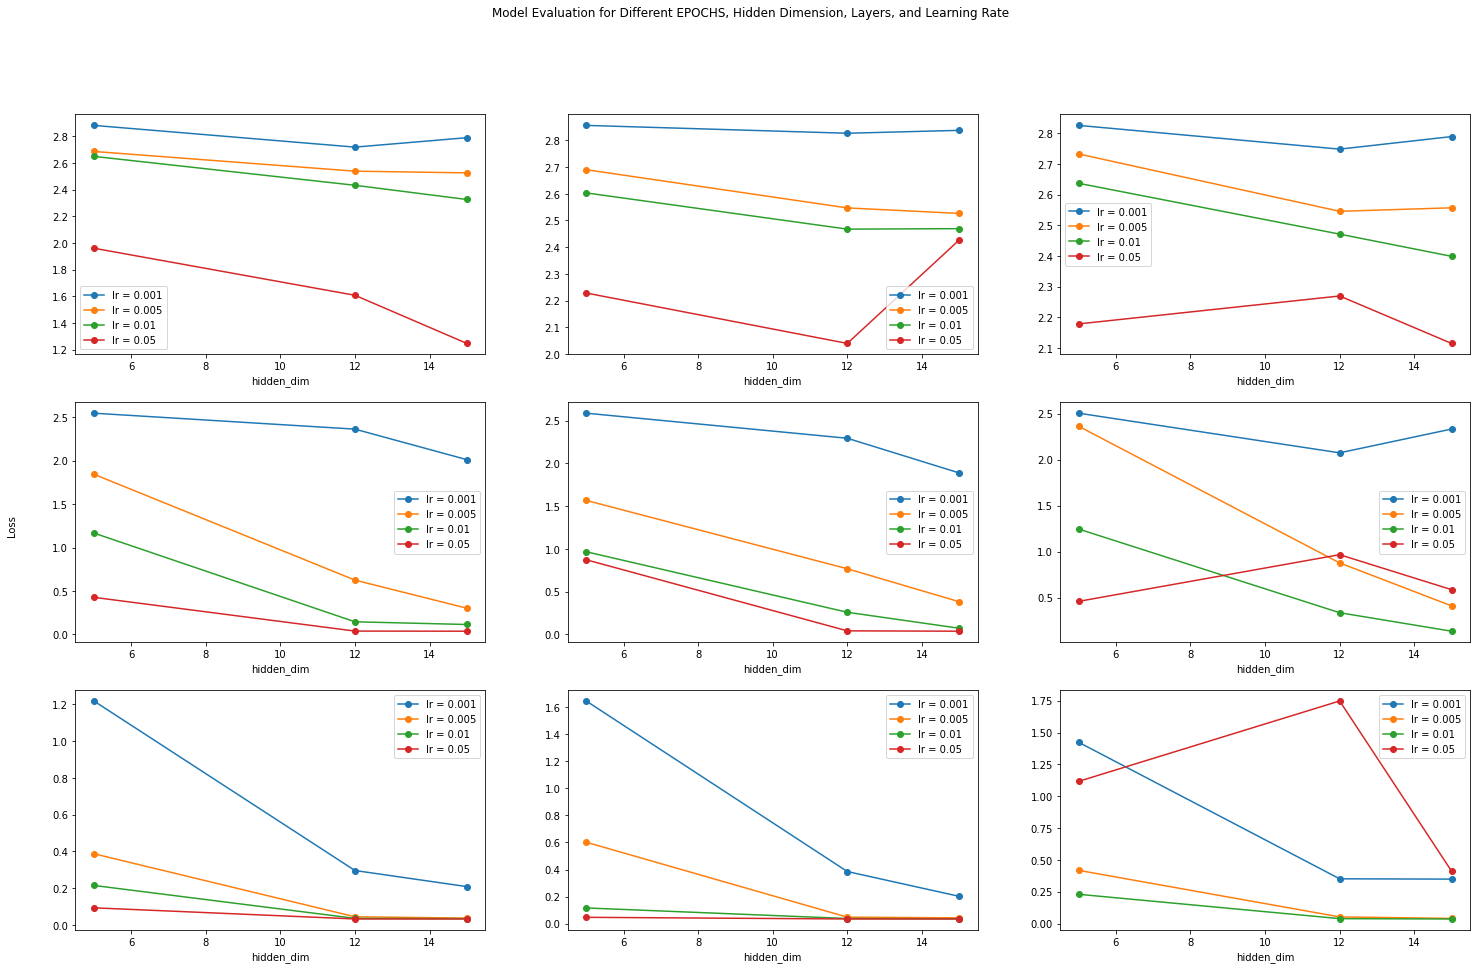

In [29]:
main()